<a href="https://colab.research.google.com/github/timothylombard/RSB/blob/master/RSB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **-1-**
## **Analytic Approach to Project Management of PCB Designs**


---




The document you are reading is a Jupyter notebook, hosted in [Colaboratory.](https://colab.research.google.com/) It is not a static page, but an interactive environment that lets you write and execute code in [Python](https://www.python.org/).   Yes, this notebook runs real code! <br>  

I assume no programming experience to use this notebook.  Python is meant to be easy to read and understand.  
There will be some code cells that are straight forward and easy to understand.  Others are a bit nuanced and will take time and experience to fully understand. 

The graphs in this notebook can be changed by updating variables  in the agreement form. 

 Use it, modify it, have fun!  Note: the [usual and customary restrictions apply.](https://github.com/timothylombard/RSB/blob/master/LICENSE) <br> 
 
 Timothy Lombard
 timothylombard@gmail.com
 
##Note:
If you are getting unexpected results try the following: <br>


1.   Refresh notebook and re-run each cell in sequence.  
2.   If the previous step doesn't work-  it could be because notebook has been altered from it's master source.      [Reload new copy to go back to starting point](https://colab.research.google.com/github/timothylombard/RSB/blob/master/RSB.ipynb). 



It is my intention that this notebook be curated by a cookbook of good ideas related to project management of data analysis recipes that can be applied to the practice of PCB development. 


This is a Google Colab Notebook to explore a project for the Road Runner Service Bureau<br>
![alt text](https://i.pinimg.com/564x/44/f9/b2/44f9b244eb21814faec6bef4c82c2023.jpg)


# **- 2 -**
## **Enviroment setup to read and analyze data**

Running the code cell after this will import the following python libraries that will be used.

[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling, cleaning, adding calculated fields and analyzing input data.   For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.  It's easy to use with google colab!  

[Seaborn:](https://seaborn.pydata.org/)  The seaborn package was developed based on the Matplotlib library. It is used to create more attractive and informative statistical graphics.



 [Parser](https://dateutil.readthedocs.io/en/stable/parser.html) from the dateutil library converts text like  1-Jan-2019 to a datetime object that enables dates to be easily analyzed. 

[Bokeh](https://bokeh.pydata.org/) is an interactive visualization library that targets modern web browsers for presentation. 

[Tabulate](https://pypi.org/project/tabulate/) Pretty-print tabular data in Python, a library and a command-line
utility.




In [0]:
import pandas as pd  #import the pandas module and shorten to pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick
import seaborn; seaborn.set()


from dateutil import parser

from bokeh.io import show, output_notebook
from bokeh.palettes import PuBu4
from bokeh.plotting import figure
from bokeh.models import Label


from tabulate import tabulate



## Setup functions to be used. 

Functions are code blocks that can be defined and reused.  It is customary in a python script to have functions defined just after the import statments. 

In [0]:
def int2dollar(number):
  ''' function that takes a number (float or integer) 
  and returns a currency string rounded up to the nearest dollar'''
  
  return f'${number:,.0f}'

#let's test it
int2dollar(12458329.59)

#First Goal-  Let's make this placement and routing progress graph.<br>
![place route progress over time](https://i.imgur.com/jsVcL2X.png)<br>


# **- 3 -**
## Basic terms of the agreement


Let's set the budget and schedule parameters for this analysis.  These are variables that we can enter once and re-use. 
Use the form on the right of this cell to assign key terms of the agreement.

In [0]:
#@title Use this form to enter Key Agreement Details

project_name = 'ABC_CPU_Motherboard' #@param {type:"string"}
schedule = '2017-01-10' #@param {type:"date"}
budget = 9000 #@param {type:"number"}
regular_rate = 50.0 #@param {type:"number"}
overtime_rate = 75.0 #@param {type:"number"}



## To plot, we need data.
For this exercise there is a csv file you can download from my git hub account.   We will create a variable and assign the path location of the csv file on github.


In [0]:
#assign variable link that points to copy of csv data
link = 'https://raw.githubusercontent.com/timothylombard/RSB/master/RSBdata.csv' #variable link now points to copy of csv data

We can create a Pandas dataframe by reading in the link to the the CSV file.  

In [0]:
df = pd.read_csv(link)   # Create a pandas dataframe from the data assigned to the link variable. 
df

# -4- Enhance the data 

Add new columns of data  using  calculated data from existing fields.

For instance, percent placed can be calculated by using the formula-


$Percent Placed = \frac{parts Placed}{TotalComponentCount}$




In [0]:
# add a new calculated column for the percentage placed 
df['pctPlaced'] = df['Placed']/df['Total_Components']
df


 $Percent Connected = \frac{Connected}{Connections}$

In [0]:
# add a new calculated column for the percentage connected 
df['pctConn'] = df['Connected']/df['Connections']
df

Let's make our first plot.   

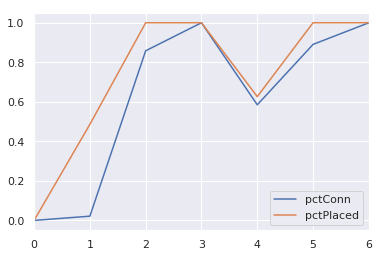

In [12]:
df[['pctConn','pctPlaced']].plot();

Notice the Y axis is a floating number between 0.0 and 1.0 and the X axis is an interger.   It would be more helpful if the X axis was a date rather than a sequence. 
To plot progess over time the data in the "Date" column needs to be converted into datetime format.

In [0]:
#Convert the datatype of the Date column from a string to a datetime 
df['Date'] =  pd.to_datetime(df['Date'])
df

This data frame has an index just to the left of the Date column [0-6],   Lets use the Date column as the index with the command below.

In [0]:
df.set_index('Date', inplace=True) #update the index to use the  the Date column to be index
df

We can also adjust the Y-axis to be a percentage

In [0]:
ax = df[['pctConn','pctPlaced']].plot(title='Placement Routing Progress for '+project_name)
ax.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))#format y-axis to %



# -6- Budget Calculations

First, lets create another calculated field for  Running Total  of the regular hours as time goes on.

In [0]:
df['regrunning'] = df['Reg_Hours'].cumsum()
df


Now let's create another calculated field for the running total  this time for overtime hours 

In [0]:
df['otrunning'] = df['OT_Hours'].cumsum()
df

**Remember the Agreement parameters?   Let's use some of those to determine how much of the budget we are spending**

Let's create another column named "spend"  

In [0]:
df['spend'] = df['regrunning']*regular_rate + df['otrunning']*overtime_rate
df


Now let's make a "Spend over time plot"

In [0]:
budget_string = int2dollar(budget)
ax = df['spend'].plot()
#add reference line showing budget target
plt.axhline(y=budget, color='r', linestyle='-')
text(x=df.index.min(), y=budget+budget/25, s="Target Budget: "+ budget_string)

#add reference line showing schedule target
plt.axvline(x=schedule, color='g', linestyle='-')
text(x=schedule, y=budget*.1, s="Target Schedule "+str(schedule))

plt.title('Expenses to date for '+project_name);
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 


In [0]:
#A simple demonstration of date calculations.

from datetime import date # Import

start_date = date(2019,1,1)
end_date = date.today()

print(end_date - start_date)

Let's use time calulactions to set some variables about our project.

Create a days_worked variable

In [0]:

days_worked = df.index.max() - df.index.min() # subtract last record date from first
days_worked.days

Create a days4job variable

In [0]:
agreement_date = parser.parse(schedule) # schedule was set in the agreement form
days4job = agreement_date - df.index.min() # subtract the first recort date from agreement_date
days4job.days


# - 8 -  Recipe: High infomation bullet graph for Schedule

Note:  A Bullet Graph visualizes a performance metric compared to a target. 
We are going to  use some of the time variables we just created make a graph like this...<br>
![Schedule bullet graph](https://i.imgur.com/whub7dv.png)

First let's do a little setup.  

In [0]:

data = [(project_name, days4job.days, days_worked.days)]
limits = [0, days4job.days, days4job.days *2, days4job.days *3]
labels = ["OK", "Late", "Very Late"]
cats = [x[0] for x in data]


Create the basic graph with an informative title

In [0]:
#determine if we are late or still have days remaining
if days4job.days > days_worked.days:
  status = str(days4job.days - days_worked.days)+" days remaining"
else:
  status = str(days_worked.days - days4job.days)+" days past due"
  
# Calculate the percentage of schedule days used.             
sch_pct = f'{days_worked.days/days4job.days*100:.2f}' +"% "  

# Make the basic figure...
p=figure(
    title=sch_pct +"Day "+str(days_worked.days)+" on a "+str(days4job.days)+" day project: "+status, 
    plot_height=125, 
    plot_width=500, 
    y_range=cats,
    toolbar_location=None,
)
p.x_range.range_padding = 0
p.grid.grid_line_color = None
p.xaxis[0].ticker.num_minor_ticks = 0

for left, right, color in zip(limits[:-1], limits[1:], PuBu4[::-1]):
    p.hbar(y=cats, left=left, right=right, height=0.8, color=color)
    
output_notebook()
show(p)

Draw a horizontal bar showing the days that have been worked.

In [0]:
perf = [x[2] for x in data]
p.hbar(y=cats, left=0, right=perf, height=0.3, color="gray")

output_notebook()
show(p)

Draw an red (Firebrick) line that indicates the schedule goal

In [0]:
comp = [x[1]for x in data]
p.segment(x0=comp, y0=[(x, -0.5) for x in cats], x1=comp,
          y1=[(x, 0.5) for x in cats], color="Firebrick", line_width=2)

output_notebook()
show(p)

Add the lables (OK, Late, Very Late) we assigned earlier

In [0]:
for start, label in zip(limits[:-1], labels):
    p.add_layout(Label(x=start, y=0, text=label, text_font_size="10pt",
                       text_color='black', y_offset=5, x_offset=15))
    
    
p.add_layout(Label(x=start, y=0, text=label, text_font_size="10pt",
                       text_color='black', y_offset=5, x_offset=15))    
output_notebook()
show(p)


Add text near the red line that details the target date

In [0]:
citation = Label(x=days4job.days, y=50,  y_units='screen',
                 text_font_size="8pt", text= "Target "+schedule, render_mode='css', x_offset=5)

p.add_layout(citation)

output_notebook()
show(p)

# - 9 -  Recipe: High infomation bullet graph for Budget

### Get the latest stats
###To get the latest statistic from our dataframe we can use the index.max() function

In [0]:
# This shows the max value of our dataframe index
df.index.max()

In [0]:
#spend2date can be determined by the value of spend in the last row of the dataframe
spend2date = df.loc[df.index.max(),'spend']
print(spend2date)

Earlier we created a function- int2dollar    This function takes a number as input and returns a currency string. 
Let's test it out on the spend2dat variable we just created. Let's try it on the spend2date variable

In [0]:
int2dollar(spend2date)

## Setup base graphic  for spend bullet graph

In [0]:
b_data = [(project_name, budget, spend2date)]
b_limits = [0, budget, budget *2, budget *3]
b_labels = ["OK", "Over Budget", "Way Over Budget"]
b_cats = [x[0] for x in data]
print(b_data, b_limits, b_labels, b_cats)

In [0]:
if budget > spend2date:
  b_status = int2dollar(budget - spend2date)+" budget remaining"
else:
  b_status = int2dollar(spend2date - budget)+" over target"
  
              
budget_pct = f'{spend2date/budget*100:.2f}' +"% "  

bp=figure(
    title=int2dollar(spend2date) +" ("+budget_pct+") spent on a "+int2dollar(budget)+" budget target project: "+b_status, 
    plot_height=125, 
    plot_width=700,  
    y_range=b_cats,
    toolbar_location=None,
)
bp.x_range.range_padding = 0
bp.grid.grid_line_color = None
bp.xaxis[0].ticker.num_minor_ticks = 0


for left, right, color in zip(b_limits[:-1], b_limits[1:], PuBu4[::-1]):
    bp.hbar(y=b_cats, left=left, right=right, height=0.8, color=color)
    
    
b_perf = [x[2] for x in b_data]
bp.hbar(y=b_cats, left=0, right=b_perf, height=0.3, color="gray")

b_comp = [x[1]for x in b_data]
bp.segment(x0=b_comp, y0=[(x, -0.5) for x in b_cats], x1=b_comp,
          y1=[(x, 0.5) for x in b_cats], color="Green", line_width=2)

for start, label in zip(b_limits[:-1], b_labels):
    bp.add_layout(Label(x=start, y=0, text=label, text_font_size="10pt",
                       text_color='black', y_offset=5, x_offset=15))
    
    
bp.add_layout(Label(x=start, y=0, text=label, text_font_size="10pt",
                       text_color='black', y_offset=5, x_offset=15)) 
    

output_notebook()
show(bp)

# Analyzing Changes
Let's now make a change report that shows when things changed and the impact of this change.<br>
 <br>


*   First we define a new function that looks for changes in the number of connections.  
*   Then we create a change pair-  the row that changed and the row prior 
*   Then by comparing data in the two change pair rows we can make some interesting analysis. 
*   Store  and return our findings in a [python dictionary for reporting](https://www.w3schools.com/python/python_dictionaries.asp)

Just a reminder of our dataframe.

From looking at the connections column we can see that a changed happend on January 13. To determine the impact of this change, we can compare that row with the row prior (before the change)


In [0]:
df

In [0]:
'''The function below takes in a dataframe and a column-name to be used to 
   that will be use to determine a change.'''

def change_report(dataframe, column2check):
  ''' function that takes a dataframe and a columnname and returns diff report '''
  changes = [] #This is an empty list to store our change data
  series_to_check = dataframe[column2check] 
  change_pairs = [(i, i-1) for i in range(1,len(series_to_check)-1) 
                  if series_to_check[i]!=series_to_check[i-1] ]
  
  for x in change_pairs:
    
    change = list(df.iloc[[x[0]]].itertuples())
    prior = list(df.iloc[[x[1]]].itertuples())
    conn_diff = change[0].Connections - prior[0].Connections
    pct_conn_diff = conn_diff /  prior[0].Connections
    comp_diff = change[0].Total_Components - prior[0].Total_Components
    pct_comp_diff = comp_diff / prior[0].Total_Components
    
    changes.append({"-0- Change Date":change[0].Index.date(),
        "-1.0- Connections":change[0].Connections,
        "-1.1- Previous Connections":prior[0].Connections,
        "-1.2- Diff in Conns": conn_diff,
        "-1.3- Pct Change Conns": f'{pct_conn_diff :.2%}',
        "-2.0- Component Count": change[0].Total_Components,
        "-2.1- Previous Comp Count":prior[0].Total_Components,
        "-2.2- Diff in Comp Count":comp_diff,                    
        "-2.3- Pct Change in Comp Count": f'{pct_comp_diff :.2%}',
        "-3.0- Routed Connections":change[0].Connected,
        "-3.1- Previous Routed Connections" :prior[0].Connected,
        "-3.2- Impact to Connected Progress" : prior[0].Connected - change[0].Connected,
        "-4.0- Parts Placed" : change[0].Placed,
        "-4.1- Previous Parts Placed": prior[0].Placed,
        "-4.2- Impact to Placement" : prior[0].Placed - change[0].Placed,
           

    })
    
    
    return changes

In [0]:
report = change_report(df, 'Connections')

In [0]:
if report:
  for change in report:
    cdf = pd.DataFrame.from_records(change,  index=[0])
    print("Stats on Changes to ", project_name)
    print(tabulate(cdf.T,  headers="keys", tablefmt="fancy_grid"))
else:
  print("No Changes")
